<a href="https://colab.research.google.com/github/digorcrispim/Ocean_Samsung/blob/main/aprendizagem_de_maquina_classificao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem de Máquina: Classificação (primeiros passos com Python)


* Algoritmo **supervisionado**: árvore de decisão


* Métrica utilizada para a avaliação dos modelos: **acurácia**
    
    
* Classificação **binária**.

In [ ]:
import numpy as np
import pandas as pd #limpeza e tratamento
import matplotlib.pyplot as plt #visualziação
import seaborn as sns #visualização
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import shap #entender o que algoritmo aprendeu

In [ ]:
pd.options.display.max_columns = None #ver todas as colunas no pandas porque por default não mostra

In [ ]:
sns.set(font_scale=1.4) #tamanho da fonte 
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})

## 1) Base de dados

* A base de dados para o nosso estudo foi obtida por meio da iniciativa de dados abertos da [Polícia Rodoviária Federal](https://portal.prf.gov.br/dados-abertos-acidentes). 


* Você tem a opção de baixar estes dados na fonte e fazer o upload no Kaggle, porém já temos essa [base de dados disponível publicamente](https://www.kaggle.com/mcamera/brazil-highway-traffic-accidents) nesta plataforma.

input(2.03 GB)

arrow_right
￼
brazil-highway-traffic-accidents

input(2.03 GB)

arrow_right
￼
brazil-highway-traffic-accidents

### 1.1) Carregando os dados

In [ ]:
# csv separado ";" e dicionário =enconding em latin-1
datatran_df = pd.read_csv('../input/brazil-highway-traffic-accidents/por_ocorrencias/datatran2017.csv', 
                          sep = ';',
                          encoding = 'latin-1')

In [ ]:
datatran_df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,8,2017-01-01,domingo,00:00:00,PR,376.0,112,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,Não,1,0,0,1,0,0,1,1,"-23,09880731","-52,38789369",SR-PR,DEL7/7,UOP05/PR
1,9,2017-01-01,domingo,00:01:00,SC,101.0,234,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1,0,0,0,1,0,0,1,"-27,8101","-48,6357",SR-SC,DEL8/1,UOP02/SC
2,11,2017-01-01,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,2,0,2,0,0,0,2,1,"-23,36951985","309,93513107",SR-PR,DEL7/7,UOP07/PR
3,12,2017-01-01,domingo,00:00:00,GO,153.0,435,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1,0,0,1,0,0,1,1,"-16,27473677","-48,96908998",SR-GO,DEL1/2,UOP01/GO
4,13,2017-01-01,domingo,00:00:00,SC,280.0,"77,3",CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,Não,1,0,1,0,0,0,1,1,"-26,44675249","-49,20166969",SR-SC,DEL8/6,UOP03/SC


In [ ]:
datatran_df.shape # qual é a dimensão do meu dataset? linhas = 89.563 e colunas= 30

(89563, 30)

### 1.2) Entendendo os dados

* [Dicionário dos dados](https://arquivos.prf.gov.br/arquivos/index.php/s/9JIz6yPXT71l9Gf#pdfviewer).

---

### Visão geral

In [ ]:
datatran_df.info() # tipo de dado das colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89563 entries, 0 to 89562
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      89563 non-null  int64  
 1   data_inversa            89563 non-null  object 
 2   dia_semana              89563 non-null  object 
 3   horario                 89563 non-null  object 
 4   uf                      89563 non-null  object 
 5   br                      89417 non-null  float64
 6   km                      89417 non-null  object 
 7   municipio               89563 non-null  object 
 8   causa_acidente          89563 non-null  object 
 9   tipo_acidente           89563 non-null  object 
 10  classificacao_acidente  89563 non-null  object 
 11  fase_dia                89563 non-null  object 
 12  sentido_via             89563 non-null  object 
 13  condicao_metereologica  89563 non-null  object 
 14  tipo_pista              89563 non-null

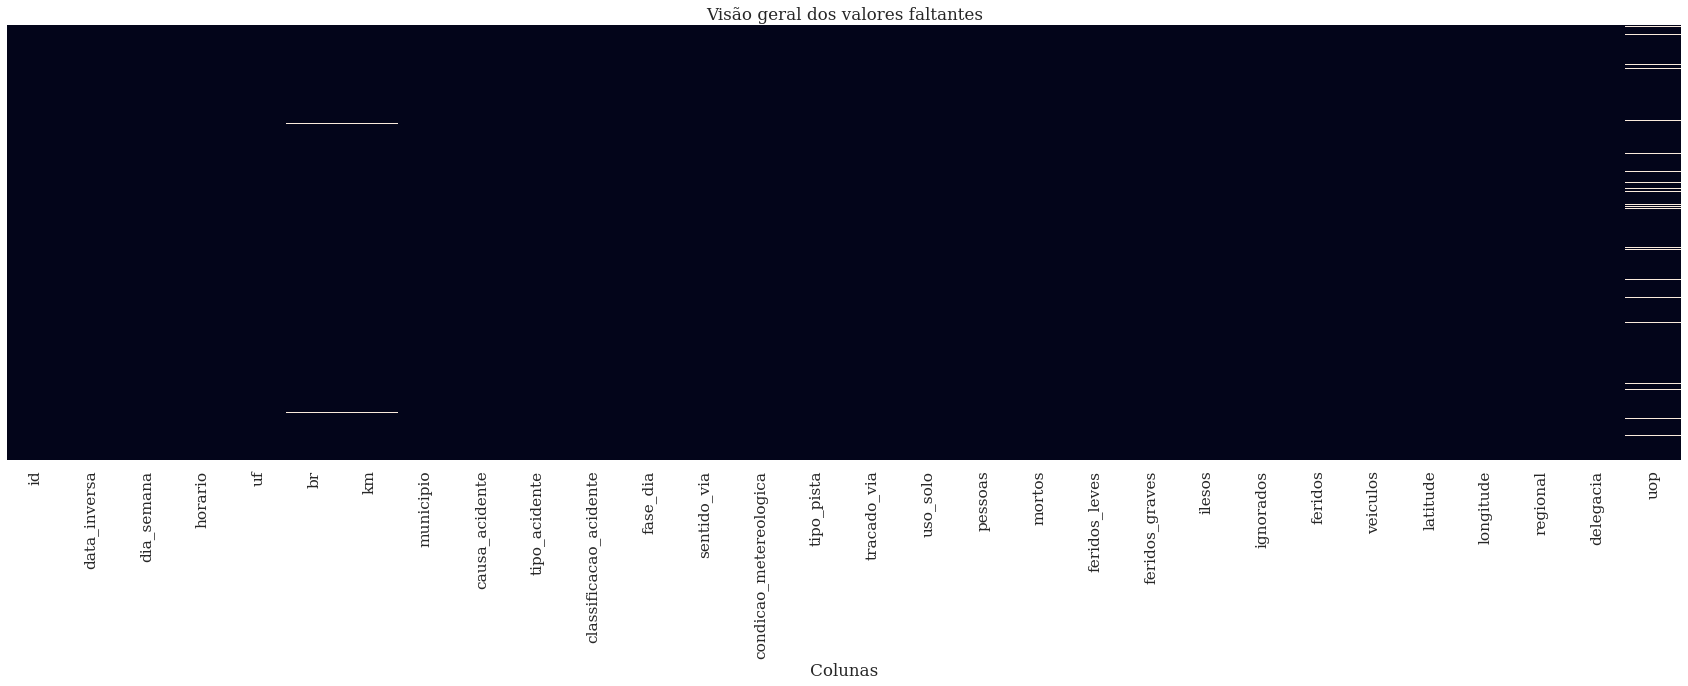

In [ ]:
#visualizar valores faltantes 

plt.figure(figsize = (30,8))

sns.heatmap(datatran_df.isnull(),# mapa de calor
            yticklabels = 0,#pinta de branco os dados nulos
            cbar = False) #senão pinta de preto

plt.title('Visão geral dos valores faltantes')
plt.xlabel('Colunas')
plt.show()

---

### Unidades Federativas com as maiores ocorrências de acidentes

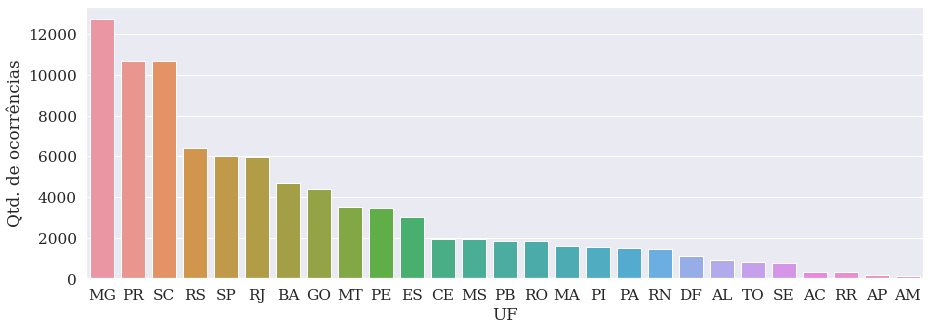

In [ ]:
plt.figure(figsize = (15,5))

ax = sns.countplot(x = 'uf', 
                   data = datatran_df, 
                   order = datatran_df['uf'].value_counts().index)

ax.set_xlabel('UF')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

---

### Dias da semana com as maiores ocorrências de acidentes

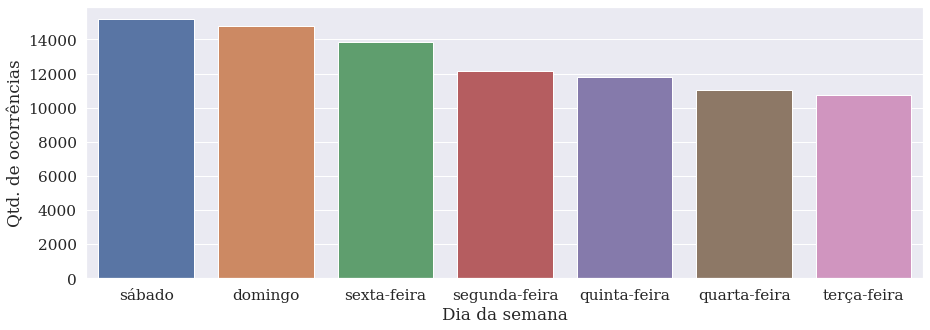

In [ ]:
plt.figure(figsize = (15,5))

ax = sns.countplot(x = 'dia_semana', 
                   data = datatran_df, 
                   order = datatran_df['dia_semana'].value_counts().index)

ax.set_xlabel('Dia da semana')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

---

### Tipos de acidentes de trânsito

In [ ]:
#valores unicos da variavel tipo_acidente
for tipo_acidente in datatran_df['tipo_acidente'].unique():
    print(tipo_acidente)

Queda de ocupante de veículo
Colisão com objeto estático
Capotamento
Tombamento
Saída de leito carroçável
Colisão traseira
Atropelamento de Animal
Colisão frontal
Incêndio
Atropelamento de Pedestre
Colisão lateral
Colisão transversal
Colisão com objeto em movimento
Derramamento de carga
Engavetamento
Danos eventuais


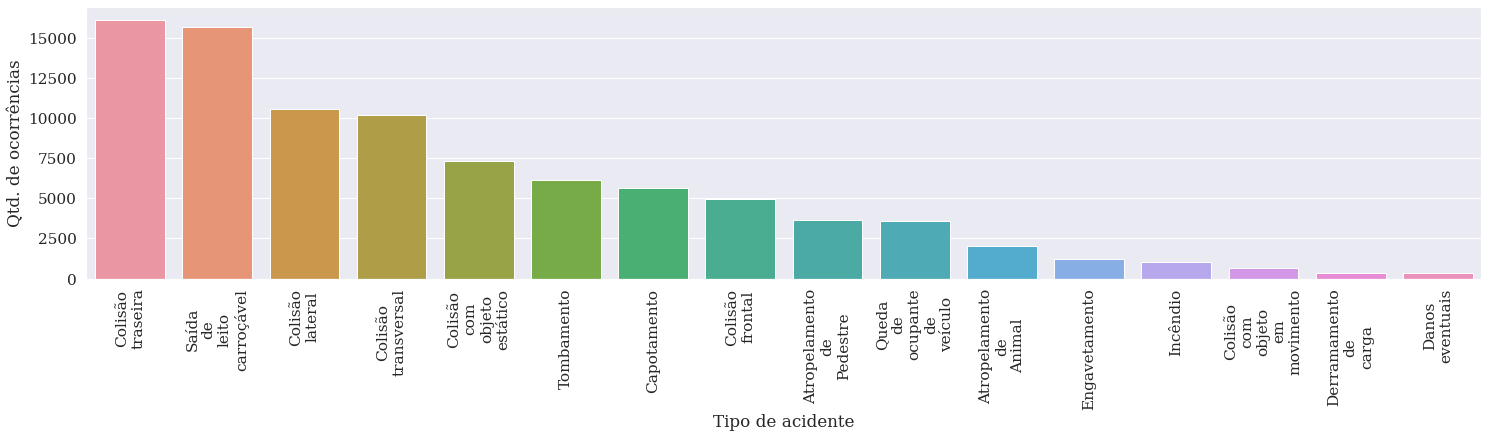

In [ ]:
plt.figure(figsize = (25,5))

ax = sns.countplot(x = 'tipo_acidente', 
                   data = datatran_df, 
                   order = datatran_df['tipo_acidente'].value_counts().index)

labels = [item.get_text().replace(' ', '\n') for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation = 90)

ax.set_xlabel('Tipo de acidente')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

---

### Causas de acidentes de trânsito

In [ ]:
for causa_acidente in datatran_df['causa_acidente'].unique():
    print(causa_acidente)

Fenômenos da Natureza
Falta de Atenção à Condução
Animais na Pista
Avarias e/ou desgaste excessivo no pneu
Ingestão de Álcool
Defeito Mecânico no Veículo
Desobediência às normas de trânsito pelo condutor
Velocidade Incompatível
Restrição de Visibilidade
Falta de Atenção do Pedestre
Condutor Dormindo
Pista Escorregadia
Não guardar distância de segurança
Ultrapassagem Indevida
Defeito na Via
Sinalização da via insuficiente ou inadequada
Mal Súbito
Carga excessiva e/ou mal acondicionada
Objeto estático sobre o leito carroçável
Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo
Ingestão de Substâncias Psicoativas
Agressão Externa
Desobediência às normas de trânsito pelo pedestre


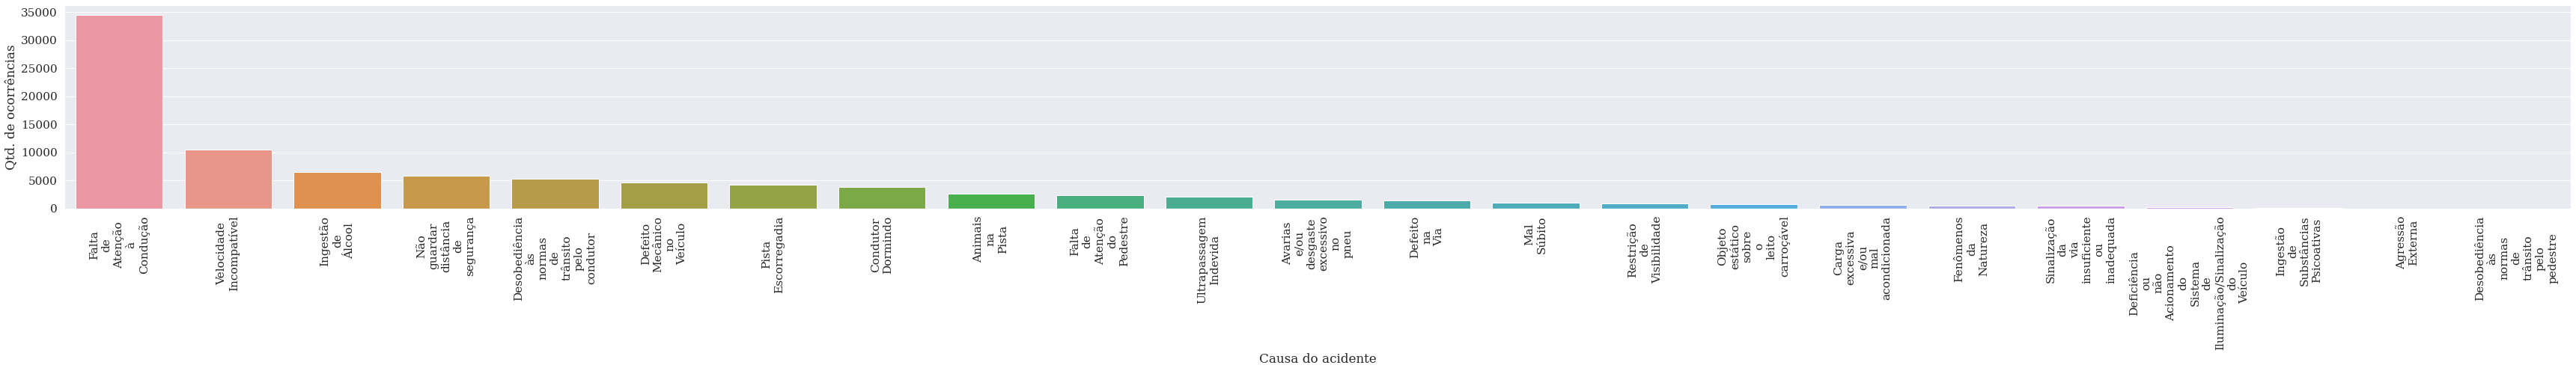

In [ ]:
plt.figure(figsize = (60,5))

ax = sns.countplot(x = 'causa_acidente', 
                   data = datatran_df, 
                   order = datatran_df['causa_acidente'].value_counts().index)

labels = [item.get_text().replace(' ', '\n') for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation = 90)

ax.set_xlabel('Causa do acidente')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

---

### Entendendo as fases do dia, condições metereológicas e classificações de acidentes

In [ ]:
for fase_dia in datatran_df['fase_dia'].unique():
    print(fase_dia)

Plena Noite
Amanhecer
Pleno dia
Anoitecer


In [ ]:
for condicao_metereologica in datatran_df['condicao_metereologica'].unique():
    print(condicao_metereologica)

Chuva
Garoa/Chuvisco
Céu Claro
Nublado
Ignorado
Nevoeiro/Neblina
Sol
Vento
Granizo
Neve


In [ ]:
for classificacao_acidente in datatran_df['classificacao_acidente'].unique():
    print(classificacao_acidente)

Com Vítimas Feridas
Sem Vítimas
Com Vítimas Fatais


<Figure size 720x1440 with 0 Axes>

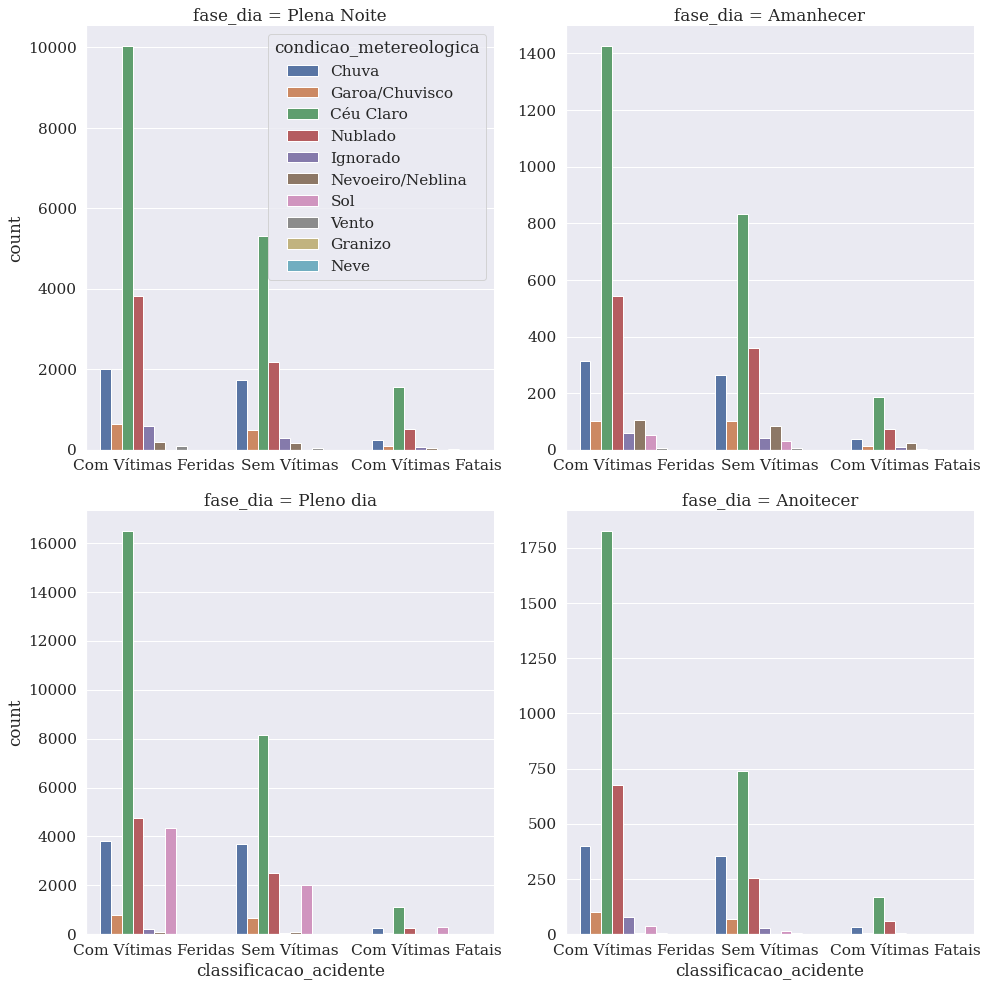

In [ ]:
#trabalhando com variaveis categóricas
plt.figure(figsize = (10,20))

ax = sns.catplot(x = 'classificacao_acidente', 
                 hue = 'condicao_metereologica', 
                 col = 'fase_dia',
                 data = datatran_df, 
                 kind = 'count',
                 height = 7,
                 col_wrap = 2, 
                 sharex = False, 
                 sharey = False, #verdadeiro compartilha a escala
                 legend_out=False)

plt.tight_layout()
plt.show()

---

### Uso do solo (urbano ou rural)

In [ ]:
for uso_solo in datatran_df['uso_solo'].unique():
    print(uso_solo)

Não
Sim


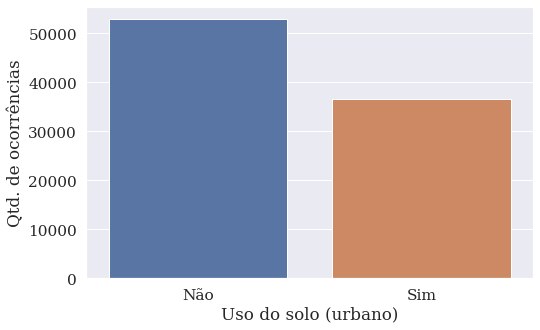

In [ ]:
plt.figure(figsize = (8,5))

ax = sns.countplot(x = 'uso_solo', 
                   data = datatran_df, 
                   order = datatran_df['uso_solo'].value_counts().index)

ax.set_xlabel('Uso do solo (urbano)')
ax.set_ylabel('Qtd. de ocorrências')

plt.show()

### 1.3) Preparando os dados para os modelos - Tratando dados faltantes

In [ ]:
#copiar o dataset para retirar valores faltantes
datatran_model_data_df = datatran_df.copy()

---

### Atributo: UOP

In [ ]:
print(datatran_model_data_df['uop'].unique()) #uop = unidade operacional

['UOP05/PR' 'UOP02/SC' 'UOP07/PR' 'UOP01/GO' 'UOP03/SC' 'UOP02/GO'
 'UOP04/PB' nan 'UOP03/RS' 'UOP01/RS' 'UOP01/PE' 'UOP08/PR' 'UOP02/PI'
 'UOP02/CE' 'UOP01/SC' 'UOP01/MS' 'UOP02/MS' 'UOP01/SP' 'UOP02/PR'
 'UOP04/SC' 'UOP06/PR' 'UOP04/PR' 'UOP01/PI' 'UOP02/BA' 'UOP01/SE'
 'UOP03/RJ' 'UOP01/MG' 'UOP01/RJ' 'UOP03/MG' 'UOP01/BA' 'UOP03/PA'
 'UOP03/PB' 'UOP02/RJ' 'UOP04/BA' 'UOP01/RO' 'UOP02/AL' 'UOP01/CE'
 'UOP03/PR' 'UOP01/RN' 'UOP01/MT' 'UOP01/ES' 'UOP02/MG' 'UOP00/PB'
 'UOP02/PA' 'UOP02/RN' 'UOP02/MT' 'UOP01/PA' 'UOP01/MA' 'UOP03/MA'
 'UOP02/RS' 'UOP03/SE' 'UOP01/PR' 'UOP03/PE' 'UOP01/AL' 'UOP03/PI'
 'UOP02/ES' 'UOP03/SP' 'UOP02/PE' 'UOP03/BA' 'UOP03/GO' 'UOP02/PB'
 'UOP02/SP' 'UOP01/PB' 'UOP02/SE' 'UOP03/CE' 'UOP04/RJ' 'UOP04/PE'
 'UOP04/MG' 'UOP02/MA' 'UOP04/RS' 'UOP03/RO' 'UOP05/PA' 'UOP02/RO'
 'UOP03/MS' 'UOP04/MS' 'UOP04/MT' 'UOP05/RS' 'UOP03/RN' 'UOP04/PA'
 'NURAM/RJ' 'UOP04/RO']


In [ ]:
# onde tiver valores NAN recebe atributo categorico 'UOP-NI'
datatran_model_data_df['uop'].fillna('UOP-NI', inplace=True)

---

### Atributo: BR

In [ ]:
print(datatran_model_data_df['br'].unique())

[376. 101. 153. 280.  60. 104. 116. 290. 408. 316.  20. 262. 163. 277.
 467. 343. 242. 235. 381.  70. 459. 324. 230.  40. 135. 356. 174. 285.
 364. 222. 232. 282.  50. 365. 405. 476. 470. 158. 407. 367.  nan  10.
 251. 304. 373. 480. 287. 386. 293. 415. 423. 267. 392. 418. 463. 369.
 110. 448. 495. 424. 393. 259. 414. 493. 410. 488. 354.  80. 412. 317.
 416. 428. 272. 468. 469. 319. 226. 452. 146. 465. 359. 156. 406. 210.
 330. 401. 471. 404. 420. 487. 155. 402. 421. 447. 427. 472.  30. 361.
 377. 308. 419. 429. 425. 403. 349. 436. 433. 435. 432. 434. 485. 473.
 122. 482. 484. 457.]


In [ ]:
# preenchi tbm os valores nulos
datatran_model_data_df['br'].fillna(0, inplace=True)

---

### Atributo: KM

In [ ]:
print(datatran_model_data_df['km'].unique())

['112' '234' '56,9' ... '917,3' '896,7' '1087']


In [ ]:
datatran_model_data_df['km'].fillna(0, inplace=True)

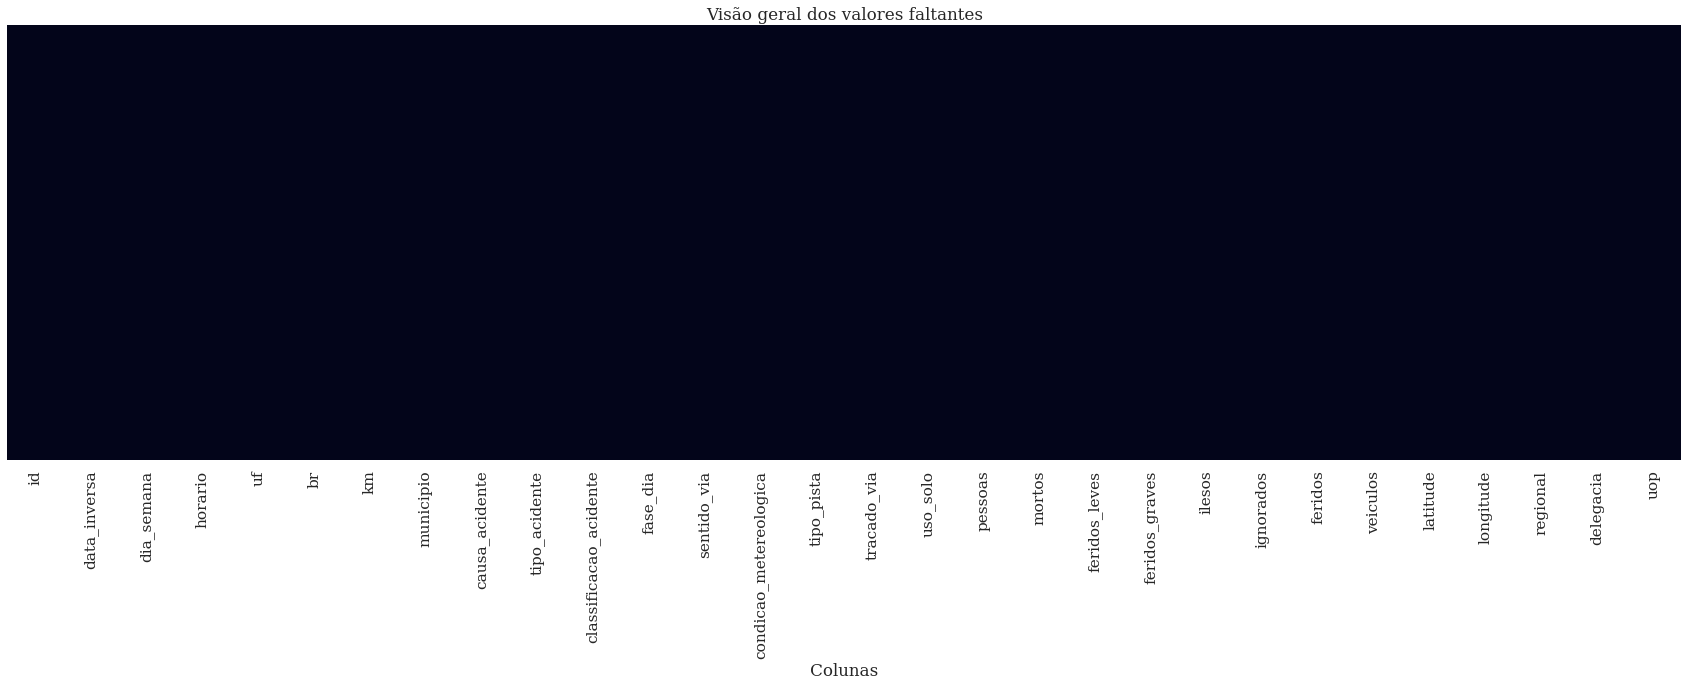

In [ ]:
#resolvido o problema de valores nulos
plt.figure(figsize = (30,8))

sns.heatmap(datatran_model_data_df.isnull(),
            yticklabels = 0,
            cbar = False)

plt.title('Visão geral dos valores faltantes')
plt.xlabel('Colunas')
plt.show()

### 1.4) Preparando os dados para os modelos - Removendo atributos e definindo as classes

In [ ]:
datatran_model_data_df.drop(['id', 'data_inversa', 'horario', 'latitude', 'longitude'],
                            axis='columns', inplace=True)
#removi id por causa de overfiitting
# inplace true para não atribuir valor novamente

In [ ]:
datatran_model_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89563 entries, 0 to 89562
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dia_semana              89563 non-null  object 
 1   uf                      89563 non-null  object 
 2   br                      89563 non-null  float64
 3   km                      89563 non-null  object 
 4   municipio               89563 non-null  object 
 5   causa_acidente          89563 non-null  object 
 6   tipo_acidente           89563 non-null  object 
 7   classificacao_acidente  89563 non-null  object 
 8   fase_dia                89563 non-null  object 
 9   sentido_via             89563 non-null  object 
 10  condicao_metereologica  89563 non-null  object 
 11  tipo_pista              89563 non-null  object 
 12  tracado_via             89563 non-null  object 
 13  uso_solo                89563 non-null  object 
 14  pessoas                 89563 non-null

In [ ]:
# classifica se o acidente foi no rural ou urbanco 
# vams trabalha descion tree -> binário

colunas = list(datatran_model_data_df.columns.values) #coloca as colunas numa lista
colunas.pop(colunas.index('uso_solo')) #deleta a coluna uso do solo da lista
datatran_model_data_df = datatran_model_data_df[colunas + ['uso_solo']] 
# coloca a coluna do uso solo para o final

In [ ]:
datatran_model_data_df.head()

,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,regional,delegacia,uop,uso_solo
0,domingo,PR,376.0,112,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,1,0,0,1,0,0,1,1,SR-PR,DEL7/7,UOP05/PR,Não
1,domingo,SC,101.0,234,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,1,0,0,0,1,0,0,1,SR-SC,DEL8/1,UOP02/SC,Não
2,domingo,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,2,0,2,0,0,0,2,1,SR-PR,DEL7/7,UOP07/PR,Não
3,domingo,GO,153.0,435,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,1,0,0,1,0,0,1,1,SR-GO,DEL1/2,UOP01/GO,Sim
4,domingo,SC,280.0,"77,3",CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,1,0,1,0,0,0,1,1,SR-SC,DEL8/6,UOP03/SC,Não


### 1.5) Preparando os dados para os modelos - Corrigindo o tipo de dado

In [ ]:
datatran_model_data_df.dtypes

dia_semana                 object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
regional                   object
delegacia                  object
uop                        object
uso_solo                   object
dtype: object

In [ ]:
datatran_model_data_df.head()

,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,regional,delegacia,uop,uso_solo
0,domingo,PR,376.0,112,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,1,0,0,1,0,0,1,1,SR-PR,DEL7/7,UOP05/PR,Não
1,domingo,SC,101.0,234,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,1,0,0,0,1,0,0,1,SR-SC,DEL8/1,UOP02/SC,Não
2,domingo,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,2,0,2,0,0,0,2,1,SR-PR,DEL7/7,UOP07/PR,Não
3,domingo,GO,153.0,435,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,1,0,0,1,0,0,1,1,SR-GO,DEL1/2,UOP01/GO,Sim
4,domingo,SC,280.0,"77,3",CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,1,0,1,0,0,0,1,1,SR-SC,DEL8/6,UOP03/SC,Não


In [ ]:
# transformar Km (string) para número (float)
# troca virgula para ponto
datatran_model_data_df['km'] = datatran_model_data_df['km'].astype(str).str.replace(',','.').astype(float)


In [ ]:
datatran_model_data_df.dtypes

dia_semana                 object
uf                         object
br                        float64
km                        float64
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
regional                   object
delegacia                  object
uop                        object
uso_solo                   object
dtype: object

In [ ]:
datatran_model_data_df.head()

,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,regional,delegacia,uop,uso_solo
0,domingo,PR,376.0,112.0,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,1,0,0,1,0,0,1,1,SR-PR,DEL7/7,UOP05/PR,Não
1,domingo,SC,101.0,234.0,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,1,0,0,0,1,0,0,1,SR-SC,DEL8/1,UOP02/SC,Não
2,domingo,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,2,0,2,0,0,0,2,1,SR-PR,DEL7/7,UOP07/PR,Não
3,domingo,GO,153.0,435.0,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,1,0,0,1,0,0,1,1,SR-GO,DEL1/2,UOP01/GO,Sim
4,domingo,SC,280.0,77.3,CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,1,0,1,0,0,0,1,1,SR-SC,DEL8/6,UOP03/SC,Não


### 1.6) Preparando os dados para os modelos - Convertendo dados categóricos

In [ ]:
datatran_model_data_df.dtypes

dia_semana                 object
uf                         object
br                        float64
km                        float64
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
regional                   object
delegacia                  object
uop                        object
uso_solo                   object
dtype: object

In [ ]:
datatran_model_data_df.head()

,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,regional,delegacia,uop,uso_solo
0,domingo,PR,376.0,112.0,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,1,0,0,1,0,0,1,1,SR-PR,DEL7/7,UOP05/PR,Não
1,domingo,SC,101.0,234.0,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,1,0,0,0,1,0,0,1,SR-SC,DEL8/1,UOP02/SC,Não
2,domingo,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,2,0,2,0,0,0,2,1,SR-PR,DEL7/7,UOP07/PR,Não
3,domingo,GO,153.0,435.0,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,1,0,0,1,0,0,1,1,SR-GO,DEL1/2,UOP01/GO,Sim
4,domingo,SC,280.0,77.3,CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,1,0,1,0,0,0,1,1,SR-SC,DEL8/6,UOP03/SC,Não


In [ ]:
# transformando categorias em numero para rodar o modelo
# outra forma : one hot code
atributos_categoricos = datatran_model_data_df.select_dtypes(include = ['O']).columns.to_list()
atributos_categoricos # isso é uma lista

['dia_semana',
 'uf',
 'municipio',
 'causa_acidente',
 'tipo_acidente',
 'classificacao_acidente',
 'fase_dia',
 'sentido_via',
 'condicao_metereologica',
 'tipo_pista',
 'tracado_via',
 'regional',
 'delegacia',
 'uop',
 'uso_solo']

In [ ]:
for atr in atributos_categoricos:
    datatran_model_data_df[atr] = datatran_model_data_df[atr].astype('category').cat.codes

In [ ]:
datatran_model_data_df.dtypes

dia_semana                   int8
uf                           int8
br                        float64
km                        float64
municipio                   int16
causa_acidente               int8
tipo_acidente                int8
classificacao_acidente       int8
fase_dia                     int8
sentido_via                  int8
condicao_metereologica       int8
tipo_pista                   int8
tracado_via                  int8
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
regional                     int8
delegacia                   int16
uop                          int8
uso_solo                     int8
dtype: object

In [ ]:
#categorias viraram numeros
datatran_model_data_df.head(10)

,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,regional,delegacia,uop,uso_solo
0,0,17,376.0,112.0,1202,12,13,1,2,0,0,2,5,1,0,0,1,0,0,1,1,17,126,76,0
1,0,23,101.0,234.0,1174,11,4,2,2,0,0,0,0,1,0,0,0,1,0,0,1,23,127,42,0
2,0,17,153.0,56.9,1506,1,2,1,2,1,2,2,5,2,0,2,0,0,0,2,1,17,126,79,0
3,0,8,153.0,435.0,63,2,15,1,2,1,1,0,5,1,0,0,1,0,0,1,1,8,2,7,1
4,0,23,280.0,77.3,493,14,14,1,2,1,0,2,3,1,0,1,0,0,0,1,1,23,132,60,0
5,0,8,60.0,188.0,673,11,8,1,2,1,7,0,5,2,0,1,0,1,0,1,2,8,1,28,1
6,0,14,104.0,3.4,1114,14,15,0,2,1,1,2,0,1,1,0,0,0,0,0,1,14,32,68,1
7,0,26,153.0,141.7,95,14,8,1,2,1,4,1,5,4,0,2,0,1,1,2,2,26,169,1,1
8,0,22,116.0,34.9,1782,5,8,1,2,1,1,2,5,6,0,4,0,2,0,4,2,22,144,59,0
9,0,22,290.0,722.0,1780,1,0,1,2,0,1,2,5,2,0,2,0,0,0,2,1,22,139,20,1


## 2) Seleção, treinamento e teste de modelos

### 2.1) Dividindo o treino e o teste

In [ ]:
#retire a coluna de classificação USO_SOLO no objeto X
#inputa a coluna USO_SOLO no objeto Y
X = datatran_model_data_df.drop(['uso_solo'], axis = 1).values
y = datatran_model_data_df['uso_solo'].values

In [ ]:
X # atributos

array([[  0.,  17., 376., ...,  17., 126.,  76.],
       [  0.,  23., 101., ...,  23., 127.,  42.],
       [  0.,  17., 153., ...,  17., 126.,  79.],
       ...,
       [  1.,   7., 262., ...,   7.,  24.,  27.],
       [  3.,   1., 104., ...,   1.,  28.,   3.],
       [  6.,  18., 101., ...,  18., 101.,  56.]])

In [ ]:
y # o que a gente quer classificar

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
#train.test split é do skit-learn
# tamanho de teste é 20%
#estratificar é balancear a variavel output (porque pode haver mais RURAL do que URBANO
#entrão estritificamos para não enviesar o modelo)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        stratify = y,
                                                        test_size = 0.2,
                                                        random_state = 42)

In [ ]:
# vializando as ammotras de treino e teste
print('Amostras de treino: {}'.format(len(X_treino)))
print('Amostras de teste: {}'.format(len(X_teste)))

Amostras de treino: 71650
Amostras de teste: 17913


### 2.2) Árvore de decisão
* Hiperparâmetros que podemos utilizar:
    * `criterion`
    * `max_depth`
    * `min_samples_split`
    * `random_state`
    
  
* [Saiba mais](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

---
### Modelo 1

In [ ]:
# critério para decision tree para classificar a divisão arvore
#max_deph é o tamanho da arvore
#min_sample_split é a quantidade de filhos por nó
modelo_arvore_1 = DecisionTreeClassifier(criterion = 'entropy', 
                                         max_depth = 10,
                                         min_samples_split = 2,
                                         random_state = 42)

In [ ]:
#validação cruzada no treino para deixar o algoritmo robusto
#recorta a amostra em 10 partes e tira um como teste
cv = KFold(n_splits = 10, shuffle = True)

In [ ]:
#treinando o modelo
%%time 

n_scores = cross_val_score(modelo_arvore_1, X_treino, y_treino, 
                           scoring = 'accuracy', cv = cv)

CPU times: user 4.73 s, sys: 0 ns, total: 4.73 s
Wall time: 4.73 s


In [ ]:
print('Valores (Acurácia): ', n_scores)
print('\nMédia de valores (Acurácia): %.4f' % (np.mean(n_scores)))

Valores (Acurácia):  [0.72868109 0.71891137 0.72295883 0.72030705 0.72923936 0.731612
 0.7311933  0.72240056 0.71905094 0.71095604]

Média de valores (Acurácia): 0.7235


In [ ]:
#mostra o tempo de duração 

%%time 

modelo_arvore_1.fit(X_treino, y_treino)

accuracy_score(y_teste, modelo_arvore_1.predict(X_teste))

UsageError: Line magic function `%%time` not found.


---
### Modelo 2

In [ ]:
#melhor modelo apos a normalização
modelo_arvore_2 = DecisionTreeClassifier(criterion = 'entropy', 
                                         max_depth = 20,
                                         min_samples_split = 4,
                                         random_state = 42)

In [ ]:
cv = KFold(n_splits = 10, shuffle = True)

In [ ]:
%%time 

n_scores = cross_val_score(modelo_arvore_2, X_treino, y_treino, 
                           scoring = 'accuracy', cv = cv)

CPU times: user 8.15 s, sys: 1.65 ms, total: 8.16 s
Wall time: 8.16 s


In [ ]:
print('Valores (Acurácia): ', n_scores)
print('\nMédia de valores (Acurácia): %.4f' % (np.mean(n_scores)))

Valores (Acurácia):  [0.72086532 0.7235171  0.73272854 0.72072575 0.72854152 0.71933008
 0.72086532 0.7303559  0.73314724 0.72044662]

Média de valores (Acurácia): 0.7251


In [ ]:
%%time

modelo_arvore_2.fit(X_treino, y_treino)

accuracy_score(y_teste, modelo_arvore_2.predict(X_teste))

CPU times: user 911 ms, sys: 0 ns, total: 911 ms
Wall time: 910 ms


0.7237202032043767

---
### Modelo 3

In [ ]:
modelo_arvore_3 = DecisionTreeClassifier(criterion = 'entropy', 
                                         max_depth = 40,
                                         min_samples_split = 4,
                                         random_state = 42)

In [ ]:
cv = KFold(n_splits = 10, shuffle = True)

In [ ]:
%%time 

n_scores = cross_val_score(modelo_arvore_3, X_treino, y_treino, 
                           scoring = 'accuracy', cv = cv)

CPU times: user 9.2 s, sys: 0 ns, total: 9.2 s
Wall time: 9.2 s


In [ ]:
print('Valores (Acurácia): ', n_scores)
print('\nMédia de valores (Acurácia): %.4f' % (np.mean(n_scores)))

Valores (Acurácia):  [0.71304955 0.71444522 0.7106769  0.71137474 0.70537334 0.71737613
 0.70216329 0.7034194  0.70872296 0.70132589]

Média de valores (Acurácia): 0.7088


In [ ]:
%%time

modelo_arvore_3.fit(X_treino, y_treino)

accuracy_score(y_teste, modelo_arvore_3.predict(X_teste))

CPU times: user 1.02 s, sys: 0 ns, total: 1.02 s
Wall time: 1.03 s


0.7104337631887456

---

### Atividade proposta

* Melhoria do modelo (parâmetros)

## 3) Melhorando os modelos - Tentiva 1: Reescalando as features

In [ ]:
datatran_model_data_df.head()

,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,regional,delegacia,uop,uso_solo
0,0,17,376.0,112.0,1202,12,13,1,2,0,0,2,5,1,0,0,1,0,0,1,1,17,126,76,0
1,0,23,101.0,234.0,1174,11,4,2,2,0,0,0,0,1,0,0,0,1,0,0,1,23,127,42,0
2,0,17,153.0,56.9,1506,1,2,1,2,1,2,2,5,2,0,2,0,0,0,2,1,17,126,79,0
3,0,8,153.0,435.0,63,2,15,1,2,1,1,0,5,1,0,0,1,0,0,1,1,8,2,7,1
4,0,23,280.0,77.3,493,14,14,1,2,1,0,2,3,1,0,1,0,0,0,1,1,23,132,60,0


In [ ]:
X

array([[  0.,  17., 376., ...,  17., 126.,  76.],
       [  0.,  23., 101., ...,  23., 127.,  42.],
       [  0.,  17., 153., ...,  17., 126.,  79.],
       ...,
       [  1.,   7., 262., ...,   7.,  24.,  27.],
       [  3.,   1., 104., ...,   1.,  28.,   3.],
       [  6.,  18., 101., ...,  18., 101.,  56.]])

In [ ]:
#normalizando as featurings
transformer = Normalizer().fit(X)
X_novo = transformer.transform(X)

In [ ]:
X_novo

array([[0.        , 0.01335108, 0.29529459, ..., 0.01335108, 0.0989551 ,
        0.0596872 ],
       [0.        , 0.01901975, 0.08352152, ..., 0.01901975, 0.10502211,
        0.03473172],
       [0.        , 0.01116722, 0.100505  , ..., 0.01116722, 0.08276883,
        0.05189474],
       ...,
       [0.00129095, 0.00903667, 0.33822984, ..., 0.00903667, 0.03098289,
        0.03485575],
       [0.00212314, 0.00070771, 0.0736021 , ..., 0.00070771, 0.01981595,
        0.00212314],
       [0.01266474, 0.03799422, 0.21318979, ..., 0.03799422, 0.21318979,
        0.11820424]])

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_novo, y,
                                                        stratify = y,
                                                        test_size = 0.2,
                                                        random_state = 42)

---
### Modelo 1

In [ ]:
%%time

modelo_arvore_1 = DecisionTreeClassifier(criterion = 'entropy', 
                                         max_depth = 10,
                                         min_samples_split = 2,
                                         random_state = 42)

cv = KFold(n_splits = 10, shuffle = True)

n_scores = cross_val_score(modelo_arvore_1, X_treino, y_treino, 
                           scoring = 'accuracy', cv = cv)

print('Valores (Acurácia): ', n_scores)
print('\nMédia de valores (Acurácia): %.4f' % (np.mean(n_scores)))

Valores (Acurácia):  [0.71137474 0.7235171  0.72379623 0.71151431 0.71695743 0.73928821
 0.72756455 0.71360782 0.72630844 0.72463364]

Média de valores (Acurácia): 0.7219
CPU times: user 24.8 s, sys: 204 µs, total: 24.8 s
Wall time: 24.8 s


In [ ]:
%%time 

modelo_arvore_1.fit(X_treino, y_treino)

accuracy_score(y_teste, modelo_arvore_1.predict(X_teste))

CPU times: user 2.72 s, sys: 0 ns, total: 2.72 s
Wall time: 2.72 s


0.7281862334617317

---
### Modelo 2

In [ ]:
%%time 

modelo_arvore_2 = DecisionTreeClassifier(criterion = 'entropy', 
                                         max_depth = 20,
                                         min_samples_split = 4,
                                         random_state = 42)

cv = KFold(n_splits = 10, shuffle = True)

n_scores = cross_val_score(modelo_arvore_2, X_treino, y_treino, 
                           scoring = 'accuracy', cv = cv)

print('Valores (Acurácia): ', n_scores)
print('\nMédia de valores (Acurácia): %.4f' % (np.mean(n_scores)))

Valores (Acurácia):  [0.73063503 0.73621773 0.73579902 0.73314724 0.72909979 0.72965806
 0.73021633 0.7307746  0.7311933  0.74068388]

Média de valores (Acurácia): 0.7327
CPU times: user 38.5 s, sys: 0 ns, total: 38.5 s
Wall time: 38.6 s


In [ ]:
%%time 

modelo_arvore_2.fit(X_treino, y_treino)

accuracy_score(y_teste, modelo_arvore_2.predict(X_teste))

CPU times: user 4.27 s, sys: 980 µs, total: 4.27 s
Wall time: 4.27 s


0.7301959470775414

---
### Modelo 3

In [ ]:
%%time

modelo_arvore_3 = DecisionTreeClassifier(criterion = 'entropy', 
                                         max_depth = 40,
                                         min_samples_split = 4,
                                         random_state = 42)

cv = KFold(n_splits = 10, shuffle = True)

n_scores = cross_val_score(modelo_arvore_3, X_treino, y_treino, 
                           scoring = 'accuracy', cv = cv)

print('Valores (Acurácia): ', n_scores)

print('\nMédia de valores (Acurácia): %.4f' % (np.mean(n_scores)))

Valores (Acurácia):  [0.71849267 0.70969993 0.70635031 0.71556176 0.71374738 0.71779484
 0.71514306 0.72561061 0.71570133 0.72100488]

Média de valores (Acurácia): 0.7159
CPU times: user 41.6 s, sys: 5.28 ms, total: 41.6 s
Wall time: 41.6 s


In [ ]:
%%time 

modelo_arvore_3.fit(X_treino, y_treino)

accuracy_score(y_teste, modelo_arvore_3.predict(X_teste))

CPU times: user 4.67 s, sys: 0 ns, total: 4.67 s
Wall time: 4.67 s


0.7176352369787306

## 4) Melhorando os modelos - Tentiva 2: Aumentando a base de dados

In [ ]:
datatran_2017_df = pd.read_csv('../input/brazil-highway-traffic-accidents/por_ocorrencias/datatran2017.csv', 
                               sep = ';',
                               encoding = 'latin-1')

datatran_2018_df = pd.read_csv('../input/brazil-highway-traffic-accidents/por_ocorrencias/datatran2018.csv', 
                               sep = ';',
                               encoding = 'latin-1')

datatran_2019_df = pd.read_csv('../input/brazil-highway-traffic-accidents/por_ocorrencias/datatran2019.csv', 
                               sep = ';',
                               encoding = 'latin-1')

In [ ]:
#empilha as bases
datatran_df = pd.concat([datatran_2017_df, datatran_2018_df, datatran_2019_df])

In [ ]:
datatran_df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,8.0,2017-01-01,domingo,00:00:00,PR,376.0,112,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,Não,1,0,0,1,0,0,1,1,"-23,09880731","-52,38789369",SR-PR,DEL7/7,UOP05/PR
1,9.0,2017-01-01,domingo,00:01:00,SC,101.0,234,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1,0,0,0,1,0,0,1,"-27,8101","-48,6357",SR-SC,DEL8/1,UOP02/SC
2,11.0,2017-01-01,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,2,0,2,0,0,0,2,1,"-23,36951985","309,93513107",SR-PR,DEL7/7,UOP07/PR
3,12.0,2017-01-01,domingo,00:00:00,GO,153.0,435,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1,0,0,1,0,0,1,1,"-16,27473677","-48,96908998",SR-GO,DEL1/2,UOP01/GO
4,13.0,2017-01-01,domingo,00:00:00,SC,280.0,"77,3",CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,Não,1,0,1,0,0,0,1,1,"-26,44675249","-49,20166969",SR-SC,DEL8/6,UOP03/SC


In [ ]:
datatran_df.shape #qauntidades de linhas 226 mil

(226304, 30)

---
### Preparando os dados para os modelos

In [ ]:
datatran_model_data_df = datatran_df.copy()

datatran_model_data_df['uop'].fillna('UOP-NI', inplace=True)
datatran_model_data_df['br'].fillna(0, inplace=True)
datatran_model_data_df['km'].fillna(0, inplace=True)

datatran_model_data_df.drop(['id', 'data_inversa', 'horario', 'latitude', 'longitude'],
                            axis='columns', inplace=True)

colunas = list(datatran_model_data_df.columns.values) 
colunas.pop(colunas.index('uso_solo'))
datatran_model_data_df = datatran_model_data_df[colunas + ['uso_solo']]

datatran_model_data_df['km'] = datatran_model_data_df['km'].astype(str).str.replace(',','.').astype(float)

atributos_categoricos = datatran_model_data_df.select_dtypes(include = ['O']).columns.to_list()
for atr in atributos_categoricos:
    datatran_model_data_df[atr] = datatran_model_data_df[atr].astype('category').cat.codes
    
datatran_model_data_df.head()

,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,regional,delegacia,uop,uso_solo
0,0,17,376.0,112.0,1274,12,13,1,2,0,0,2,5,1,0,0,1,0,0,1,1,18,135,86,0
1,0,23,101.0,234.0,1242,11,4,2,2,0,0,0,0,1,0,0,0,1,0,0,1,24,136,52,0
2,0,17,153.0,56.9,1603,1,2,1,2,1,2,2,5,2,0,2,0,0,0,2,1,18,135,91,0
3,0,8,153.0,435.0,71,2,15,1,2,1,1,0,5,1,0,0,1,0,0,1,1,9,9,17,1
4,0,23,280.0,77.3,523,14,14,1,2,1,0,2,3,1,0,1,0,0,0,1,1,24,141,70,0


In [ ]:
datatran_model_data_df.shape

(226304, 25)

In [ ]:
X = datatran_model_data_df.drop(['uso_solo'], axis = 1).values
y = datatran_model_data_df['uso_solo'].values

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        stratify = y,
                                                        test_size = 0.2,
                                                        random_state = 42)

print('Amostras de treino: {}'.format(len(X_treino)))
print('Amostras de teste: {}'.format(len(X_teste)))

Amostras de treino: 181043
Amostras de teste: 45261


---
### Modelo 1

In [ ]:
%%time

modelo_arvore_1 = DecisionTreeClassifier(criterion = 'entropy', 
                                         max_depth = 10,
                                         min_samples_split = 2,
                                         random_state = 42)

cv = KFold(n_splits = 10, shuffle = True)

n_scores = cross_val_score(modelo_arvore_1, X_treino, y_treino, 
                           scoring = 'accuracy', cv = cv)

print('Valores (Acurácia): ', n_scores)
print('\nMédia de valores (Acurácia): %.4f' % (np.mean(n_scores)))

Valores (Acurácia):  [0.71422259 0.72471693 0.72068489 0.71094786 0.72077994 0.71034026
 0.7164715  0.71183164 0.71796288 0.71961997]

Média de valores (Acurácia): 0.7168
CPU times: user 13 s, sys: 13.4 ms, total: 13 s
Wall time: 13 s


In [ ]:
%%time 

modelo_arvore_1.fit(X_treino, y_treino)

accuracy_score(y_teste, modelo_arvore_1.predict(X_teste))

CPU times: user 1.51 s, sys: 0 ns, total: 1.51 s
Wall time: 1.51 s


0.716113210048386

---
### Modelo 2

In [ ]:
%%time 

modelo_arvore_2 = DecisionTreeClassifier(criterion = 'entropy', 
                                         max_depth = 20,
                                         min_samples_split = 4,
                                         random_state = 42)

cv = KFold(n_splits = 10, shuffle = True)

n_scores = cross_val_score(modelo_arvore_2, X_treino, y_treino, 
                           scoring = 'accuracy', cv = cv)

print('Valores (Acurácia): ', n_scores)
print('\nMédia de valores (Acurácia): %.4f' % (np.mean(n_scores)))

Valores (Acurácia):  [0.73863574 0.7418945  0.74454571 0.7434821  0.74640963 0.74060981
 0.74199072 0.74442112 0.73293195 0.73552806]

Média de valores (Acurácia): 0.7410
CPU times: user 21.7 s, sys: 10.1 ms, total: 21.7 s
Wall time: 21.7 s


In [ ]:
%%time

modelo_arvore_2.fit(X_treino, y_treino)

accuracy_score(y_teste, modelo_arvore_2.predict(X_teste))

CPU times: user 2.35 s, sys: 0 ns, total: 2.35 s
Wall time: 2.35 s


0.7425819137889131

---
### Modelo 3

In [ ]:
%%time

modelo_arvore_3 = DecisionTreeClassifier(criterion = 'entropy', 
                                         max_depth = 40,
                                         min_samples_split = 4,
                                         random_state = 42)

cv = KFold(n_splits = 10, shuffle = True)

n_scores = cross_val_score(modelo_arvore_3, X_treino, y_treino, 
                           scoring = 'accuracy', cv = cv)

print('Valores (Acurácia): ', n_scores)
print('\nMédia de valores (Acurácia): %.4f' % (np.mean(n_scores)))

Valores (Acurácia):  [0.71775753 0.71339409 0.71538249 0.71669244 0.72105612 0.71542201
 0.71868095 0.71801812 0.71514582 0.71216306]

Média de valores (Acurácia): 0.7164
CPU times: user 25.4 s, sys: 1.46 ms, total: 25.4 s
Wall time: 25.4 s


In [ ]:
%%time

modelo_arvore_3.fit(X_treino, y_treino)

accuracy_score(y_teste, modelo_arvore_3.predict(X_teste))

CPU times: user 2.8 s, sys: 3.95 ms, total: 2.8 s
Wall time: 2.8 s


0.7169306908817746

---

### Atividade proposta

* Modelo da atividade anterior com os novos dados

## 5) Entendendo os modelos

In [ ]:
shap.initjs()

In [ ]:
%%time

explainer = shap.TreeExplainer(modelo_arvore_2)
shap_values = explainer.shap_values(X_treino)

CPU times: user 26min 26s, sys: 4.3 s, total: 26min 30s
Wall time: 26min 22s


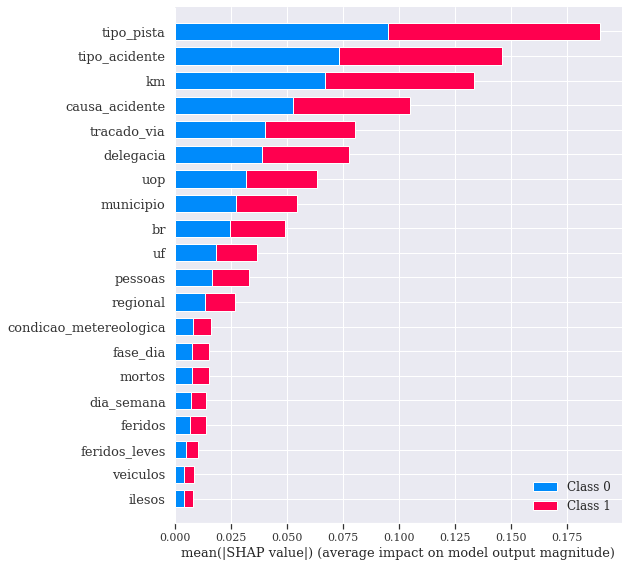

In [ ]:
shap.summary_plot(shap_values, datatran_model_data_df.drop(['uso_solo'], axis = 1).columns, plot_type = 'bar')

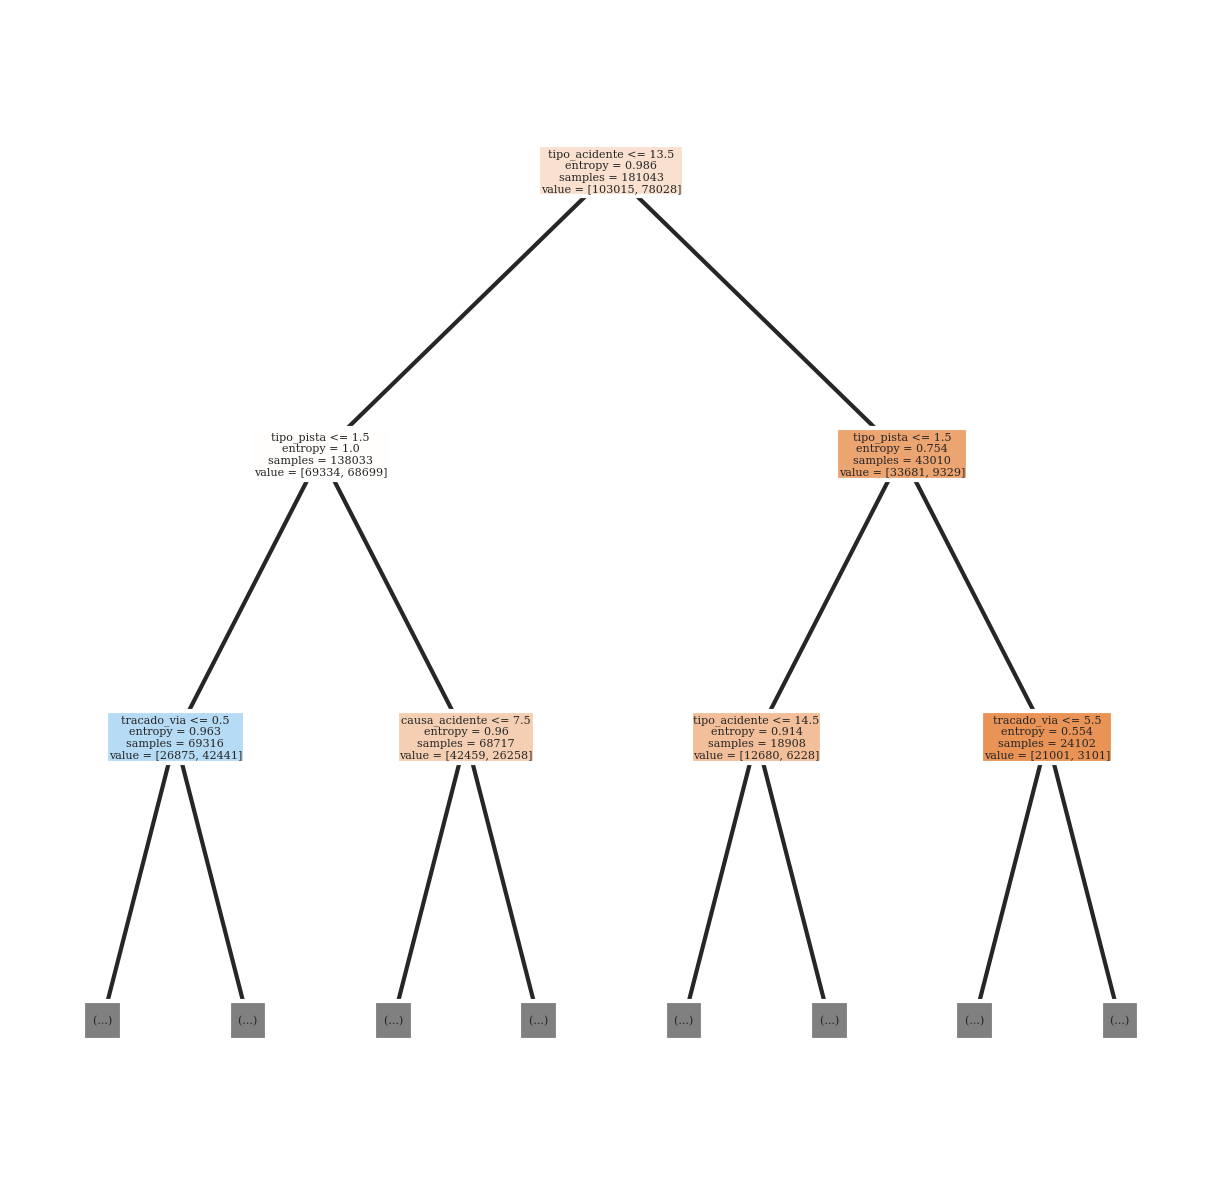

CPU times: user 1.18 s, sys: 18.1 ms, total: 1.2 s
Wall time: 1.19 s


In [ ]:
%%time

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi = 300)
axes = plot_tree(decision_tree = modelo_arvore_2,
                 max_depth = 2,
                 feature_names = datatran_model_data_df.columns,
                 filled = True)

fig.savefig("arvore_decisao.png")

plt.show()

---

### Atividade proposta

* Interpretabilidade do modelo da atividade anterior